In [1]:
from concurrent.futures import ThreadPoolExecutor

%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import time
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

import segregation

In [2]:
os.chdir('C:\\Users\\renan\\Desktop\\segregation\\segregation')

from segregation.dissimilarity import Dissim
from segregation.spatial_dissimilarity import Spatial_Dissim
from segregation.entropy import Entropy
from segregation.perimeter_area_ratio_spatial_dissimilarity import Perimeter_Area_Ratio_Spatial_Dissim
from segregation.absolute_centralization import Absolute_Centralization
from segregation.absolute_concentration import Absolute_Concentration
from segregation.atkinson import Atkinson
from segregation.bias_corrected_dissimilarity import Bias_Corrected_Dissim
from segregation.boundary_spatial_dissimilarity import Boundary_Spatial_Dissim
from segregation.conprof import Con_Prof
from segregation.correlationr import Correlation_R
from segregation.delta import Delta
from segregation.density_corrected_dissimilarity import Density_Corrected_Dissim
from segregation.exposure import Exposure
from segregation.gini_seg import Gini_Seg
from segregation.isolation import Isolation
from segregation.modified_dissimilarity import Modified_Dissim
from segregation.modified_gini_seg import Modified_Gini_Seg
from segregation.relative_centralization import Relative_Centralization
from segregation.relative_clustering import Relative_Clustering
from segregation.relative_concentration import Relative_Concentration
from segregation.spatial_exposure import Spatial_Exposure
from segregation.spatial_isolation import Spatial_Isolation
from segregation.spatial_prox_profile import Spatial_Prox_Prof
from segregation.infer_segregation import Infer_Segregation
from segregation.compare_segregation import Compare_Segregation
from segregation.spatial_proximity import Spatial_Proximity

In [3]:
os.chdir('C:/Users/renan/Desktop/full_count_2010')
census_2010 = pd.read_csv('std_2010_fullcount.csv', encoding = "ISO-8859-1", sep = ",")

with open('tracts_US.pkl', 'rb') as input:
    map_gpd = pickle.load(input)

In [4]:
df = census_2010.loc[(census_2010.county == "Los Angeles County")] # & (census_2010.state == 'WI')
df.head()

,trtid10,state,county,tract,pop10,nhwht10,nhblk10,ntv10,asian10,hisp10,...,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10
7819,6037920044,CA,Los Angeles County,Census Tract 9200.44,2686,1637,87,10,291,651,...,206,49,243,34,42,3,0,1,wha,Dual immig
7821,6037573003,CA,Los Angeles County,Census Tract 5730.03,1802,337,291,7,319,840,...,239,69,305,50,42,7,0,3,wbha,Global
7823,6037570403,CA,Los Angeles County,Census Tract 5704.03,4587,115,727,9,205,3521,...,1292,178,202,32,43,4,1,2,bha,Minority
7824,6037553503,CA,Los Angeles County,Census Tract 5535.03,2768,124,389,6,62,2178,...,646,182,54,10,11,2,0,1,bh,Minority
7825,6037552302,CA,Los Angeles County,Census Tract 5523.02,3648,681,206,28,516,2209,...,579,361,490,72,146,8,1,1,wbha,Global


In [5]:
map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
gdf = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')

# REMOVING ISLANDS OF LOS ANGELES COUNTY
#gdf = gdf[gdf.centroid.y > 33.6]
#gdf = gdf.set_geometry('geometry')

gdf['share'] = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['nhblk10'].sum())
gdf['rel']   = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['pop10'])

In [6]:
gdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,COUNTY_ID,county_id2,COUNTYNS10,NAME10_COU,GEOID_MSA,...,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10,share,rel
0,06,037,920336,06037920336,9203.36,06037,6037,277283,Los Angeles,31080,...,209,21,46,16,5,0,wha,Dual immig,0.000120,0.014942
1,06,037,920044,06037920044,9200.44,06037,6037,277283,Los Angeles,31080,...,243,34,42,3,0,1,wha,Dual immig,0.000099,0.032390
2,06,037,573003,06037573003,5730.03,06037,6037,277283,Los Angeles,31080,...,305,50,42,7,0,3,wbha,Global,0.000332,0.161487
3,06,037,571704,06037571704,5717.04,06037,6037,277283,Los Angeles,31080,...,614,152,72,12,3,0,bha,Minority,0.000804,0.171658
4,06,037,570403,06037570403,5704.03,06037,6037,277283,Los Angeles,31080,...,202,32,43,4,1,2,bha,Minority,0.000829,0.158491


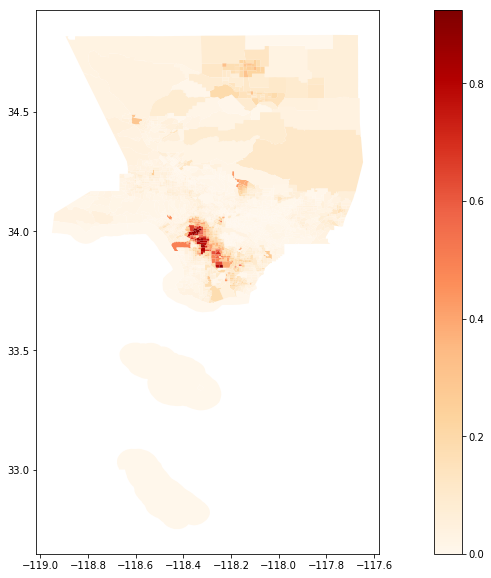

In [7]:
import matplotlib
ax1 = gdf.plot(column='rel',
               cmap = 'OrRd', 
               #figsize=(30,5),
               figsize=(20,10),
               legend = True)

In [8]:
# Using the geopandas, because two islands were removed

# Non-Spatial measures
D = Dissim(gdf, 'nhblk10', 'pop10')
G = Gini_Seg(gdf, 'nhblk10', 'pop10')
H = Entropy(gdf, 'nhblk10', 'pop10')
A = Atkinson(gdf, 'nhblk10', 'pop10')
xPy = Exposure(gdf, 'nhblk10', 'pop10')
xPx = Isolation(gdf, 'nhblk10', 'pop10')
R = Con_Prof(gdf, 'nhblk10', 'pop10')
Dbc = Bias_Corrected_Dissim(gdf, 'nhblk10', 'pop10')
Ddc = Density_Corrected_Dissim(gdf, 'nhblk10', 'pop10')
V = Correlation_R(gdf, 'nhblk10', 'pop10')
Dct = Modified_Dissim(gdf, 'nhblk10', 'pop10')
Gct = Modified_Gini_Seg(gdf, 'nhblk10', 'pop10')

In [9]:
# Spatial measures
SD = Spatial_Dissim(gdf, 'nhblk10', 'pop10')
PARD = Perimeter_Area_Ratio_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
BSD = Boundary_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
ACE = Absolute_Centralization(gdf, 'nhblk10', 'pop10')
ACO = Absolute_Concentration(gdf, 'nhblk10', 'pop10')
DEL = Delta(gdf, 'nhblk10', 'pop10')
RCE = Relative_Centralization(gdf, 'nhblk10', 'pop10')
RCL = Relative_Clustering(gdf, 'nhblk10', 'pop10')
RCO = Relative_Concentration(gdf, 'nhblk10', 'pop10')
SxPy = Spatial_Exposure(gdf, 'nhblk10', 'pop10')
SxPx = Spatial_Isolation(gdf, 'nhblk10', 'pop10')
SPP = Spatial_Prox_Prof(gdf, 'nhblk10', 'pop10')
SP = Spatial_Proximity(gdf, 'nhblk10', 'pop10')

In [10]:
overall_iterations_frequency = 500

In [11]:
def Timed_Infer_Segregation(index, **kwargs):
    t0 = time.time()
    aux = Infer_Segregation(index, **kwargs)
    t1 = time.time()
    print('{} time: {}'.format(aux._class_name, t1 - t0))
    return aux

In [12]:
def Timed_Compare_Segregation(tupled_pair, **kwargs):
    t0 = time.time()
    index1, index2 = tupled_pair
    aux = Compare_Segregation(index1, index2, **kwargs)
    t1 = time.time()
    print('{} time: {}'.format(aux._class_name, t1 - t0))
    return aux

### Los Angeles in 2010: systematic approach

In [13]:
all_measures = (D, G, H, xPx, xPy, A, V, R, Dct, Gct, Dbc, Ddc, SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

In [14]:
e = ThreadPoolExecutor()

sys_application = [e.submit(Timed_Infer_Segregation, i, iterations = overall_iterations_frequency) 
                       for i in all_measures]

In [15]:
sys_application_result = [f.result() for f in sys_application]

Dissim time: 3.666422128677368
Isolation time: 8.670661926269531
Exposure time: 10.867535829544067
Correlation_R time: 12.003364562988281
Atkinson time: 13.393310070037842
Entropy time: 14.778186559677124
Gini_Seg time: 69.19328927993774
Delta time: 474.57869267463684
Absolute_Concentration time: 481.863906621933
Relative_Concentration time: 494.4138765335083
Con_Prof time: 1346.7124283313751
Bias_Corrected_Dissim time: 1419.4513971805573
Modified_Dissim time: 2131.009399652481
Absolute_Centralization time: 3890.28546333313
Relative_Centralization time: 3909.4262940883636
Spatial_Isolation time: 3933.6486954689026
Spatial_Exposure time: 3946.274557828903
Relative_Clustering time: 3954.3754699230194
Spatial_Proximity time: 3954.7479712963104
Spatial_Dissim time: 6596.933434247971
Boundary_Spatial_Dissim time: 9008.367946386337
Perimeter_Area_Ratio_Spatial_Dissim time: 9176.544145822525
Density_Corrected_Dissim time: 13767.132346868515
Spatial_Prox_Prof time: 15711.663218975067
Modified_

### Los Angeles in 2010: Permutation approach

In [16]:
# Permutation Approach

# For permutation approach, we need to subset the all_measures object to only spatial measures

spatial_measures = (SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

In [17]:
e = ThreadPoolExecutor()

per_application = [e.submit(Timed_Infer_Segregation, i, null_approach = "permutation", iterations = overall_iterations_frequency) 
                       for i in spatial_measures]

In [18]:
per_application_result = [f.result() for f in per_application]

Delta time: 93.34415411949158
Relative_Concentration time: 95.81795978546143
Absolute_Concentration time: 96.78019905090332
Relative_Centralization time: 1475.5365536212921
Absolute_Centralization time: 1516.6634333133698
Relative_Clustering time: 1543.7853977680206
Spatial_Isolation time: 1571.0923075675964
Spatial_Proximity time: 1579.574791431427
Spatial_Exposure time: 1593.306025981903
Spatial_Dissim time: 2116.0544941425323
Boundary_Spatial_Dissim time: 3579.6503033638
Perimeter_Area_Ratio_Spatial_Dissim time: 3619.7320477962494
Spatial_Prox_Prof time: 9450.654601812363


### Los Angeles against itself: Random Data approach

In [19]:
census_2000 = pd.read_csv("C:/Users/renan/Desktop/full_count_2010/LTDB_Std_2000_fullcount.csv", encoding = "ISO-8859-1", sep = ",")

census_2000 = census_2000.loc[(census_2000.county == "Los Angeles County")]

# Some population data for 2000 came as decimals
census_2000['pop00']   = round(census_2000['POP00']).astype(int)
census_2000['nhblk00'] = round(census_2000['NHBLK00']).astype(int)
census_2000['trtid10'] = census_2000['TRTID10']
gdf_2000 = map_gpd.merge(census_2000, left_on = 'INTGEOID10', right_on = 'trtid10')[['geometry', 'nhblk00', 'pop00']]

# REMOVING ISLANDS OF LOS ANGELES COUNTY
#gdf_2000 = gdf_2000[gdf_2000.centroid.y > 33.6]

In [20]:
gdf_2000['share'] = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['nhblk00'].sum())
gdf_2000['rel']   = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['pop00'])

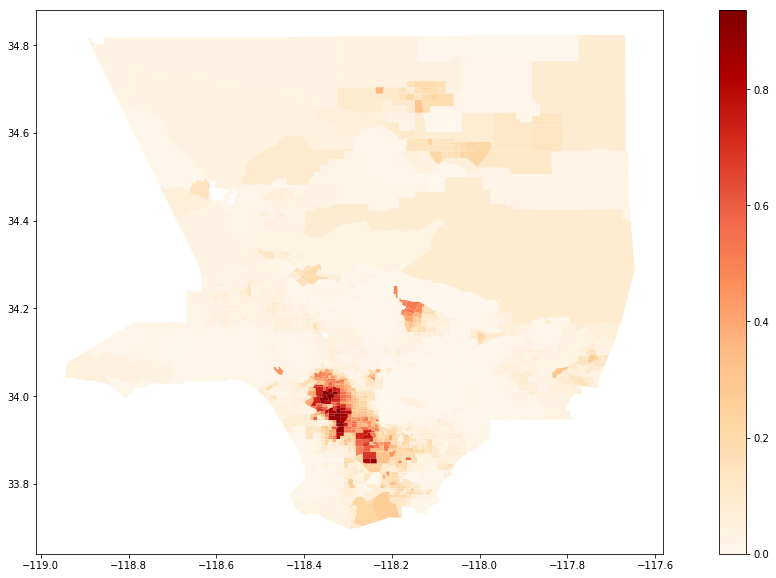

In [21]:
ax1 = gdf_2000.plot(column='rel',
                    cmap = 'OrRd', 
                    figsize=(20,10),
                    legend = True)

In [22]:
# Non-Spatial measures
D_2000 = Dissim(gdf_2000, 'nhblk00', 'pop00')
G_2000 = Gini_Seg(gdf_2000, 'nhblk00', 'pop00')
H_2000 = Entropy(gdf_2000, 'nhblk00', 'pop00')
A_2000 = Atkinson(gdf_2000, 'nhblk00', 'pop00')
xPy_2000 = Exposure(gdf_2000, 'nhblk00', 'pop00')
xPx_2000 = Isolation(gdf_2000, 'nhblk00', 'pop00')
R_2000 = Con_Prof(gdf_2000, 'nhblk00', 'pop00')
Dbc_2000 = Bias_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
Ddc_2000 = Density_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
V_2000 = Correlation_R(gdf_2000, 'nhblk00', 'pop00')
Dct_2000 = Modified_Dissim(gdf_2000, 'nhblk00', 'pop00')
Gct_2000 = Modified_Gini_Seg(gdf_2000, 'nhblk00', 'pop00')

In [23]:
# Spatial measures
SD_2000 = Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
PARD_2000 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
BSD_2000 = Boundary_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
ACE_2000 = Absolute_Centralization(gdf_2000, 'nhblk00', 'pop00')
ACO_2000 = Absolute_Concentration(gdf_2000, 'nhblk00', 'pop00')
DEL_2000 = Delta(gdf_2000, 'nhblk00', 'pop00')
RCE_2000 = Relative_Centralization(gdf_2000, 'nhblk00', 'pop00')
RCL_2000 = Relative_Clustering(gdf_2000, 'nhblk00', 'pop00')
RCO_2000 = Relative_Concentration(gdf_2000, 'nhblk00', 'pop00')
SxPy_2000 = Spatial_Exposure(gdf_2000, 'nhblk00', 'pop00')
SxPx_2000 = Spatial_Isolation(gdf_2000, 'nhblk00', 'pop00')
SPP_2000 = Spatial_Prox_Prof(gdf_2000, 'nhblk00', 'pop00')
SP_2000 = Spatial_Proximity(gdf_2000, 'nhblk00', 'pop00')

In [24]:
all_measures_2000 = (D_2000, G_2000, H_2000, xPx_2000, xPy_2000, A_2000, V_2000, R_2000, Dct_2000, Gct_2000, Dbc_2000, Ddc_2000, SPP_2000, SD_2000, BSD_2000, PARD_2000, SxPx_2000, SxPy_2000, SP_2000, RCL_2000, DEL_2000, ACO_2000, RCO_2000, ACE_2000, RCE_2000)

In [25]:
pairwise = tuple(zip(all_measures, all_measures_2000))

In [26]:
e = ThreadPoolExecutor()

la_la_application = [e.submit(Timed_Compare_Segregation, i, iterations = overall_iterations_frequency) 
                              for i in pairwise]

In [27]:
la_la_application_result = [f.result() for f in la_la_application]

Isolation time: 117.13142704963684
Correlation_R time: 119.08410334587097
Dissim time: 120.99426746368408
Exposure time: 121.11914682388306
Atkinson time: 123.23737835884094
Entropy time: 126.20549416542053
Gini_Seg time: 194.84416317939758
Delta time: 963.8141145706177
Absolute_Concentration time: 994.448212146759
Relative_Concentration time: 1013.7444341182709
Con_Prof time: 2681.260794878006
Bias_Corrected_Dissim time: 2731.2608246803284
Modified_Dissim time: 4379.3827793598175
Absolute_Centralization time: 7625.301874160767
Relative_Centralization time: 7640.272608757019
Relative_Clustering time: 7858.337851524353
Spatial_Exposure time: 7866.853569030762
Spatial_Isolation time: 7872.401411533356
Spatial_Proximity time: 7885.845354318619
Spatial_Dissim time: 13696.72365283966
Boundary_Spatial_Dissim time: 18485.291406154633
Perimeter_Area_Ratio_Spatial_Dissim time: 18519.791073560715
Spatial_Prox_Prof time: 35051.128068208694
Density_Corrected_Dissim time: 42607.456941604614
Modifie

### Los Angeles against New York in 2010: random data approach

In [28]:
df = census_2010.loc[(census_2010.county.isin(["New York County", "Bronx County", "Kings County", "Queens County", "Richmond County"])) & (census_2010.state == 'NY')] # & (census_2010.state == 'WI')
df

,trtid10,state,county,tract,pop10,nhwht10,nhblk10,ntv10,asian10,hisp10,...,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,globd10,globg10
55589,36005000100,NY,Bronx County,Census Tract 1,11091,782,6208,26,39,3779,...,0,60,39,0,1,25,0,0,bh,Minority
55590,36005000200,NY,Bronx County,Census Tract 2,4334,130,1012,12,137,2993,...,730,476,133,32,18,12,5,0,bha,Minority
55591,36005000400,NY,Bronx County,Census Tract 4,5503,189,1365,14,126,3755,...,932,476,116,26,16,11,3,2,bh,Minority
55592,36005001600,NY,Bronx County,Census Tract 16,5643,195,1854,24,58,3482,...,807,700,50,3,6,16,5,4,bh,Minority
55593,36005001900,NY,Bronx County,Census Tract 19,1917,187,502,10,27,1186,...,302,89,22,1,0,10,2,0,bh,Minority
55595,36005002000,NY,Bronx County,Census Tract 20,8731,112,3101,45,93,5361,...,1449,745,90,16,8,44,20,2,bh,Minority
55597,36005002300,NY,Bronx County,Census Tract 23,4933,41,1628,9,13,3223,...,827,605,9,2,3,8,5,2,bh,Minority
55599,36005002400,NY,Bronx County,Census Tract 24,4,0,0,0,0,4,...,0,0,0,0,0,0,0,0,h,Minority
55601,36005002500,NY,Bronx County,Census Tract 25,5491,78,1001,11,40,4349,...,1142,559,26,5,1,10,2,2,bh,Minority
55603,36005002701,NY,Bronx County,Census Tract 27.01,3113,28,1009,15,6,2050,...,562,271,5,4,0,15,8,1,bh,Minority


In [29]:
ny_gdf_pre = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
ny_gdf = ny_gdf_pre[['geometry', 'pop10', 'nhblk10']]

ny_gdf['share'] = np.where(ny_gdf['pop10'] == 0, 0, ny_gdf['nhblk10'] / ny_gdf['nhblk10'].sum())
ny_gdf['rel']   = np.where(ny_gdf['pop10'] == 0, 0, ny_gdf['nhblk10'] / ny_gdf['pop10'])

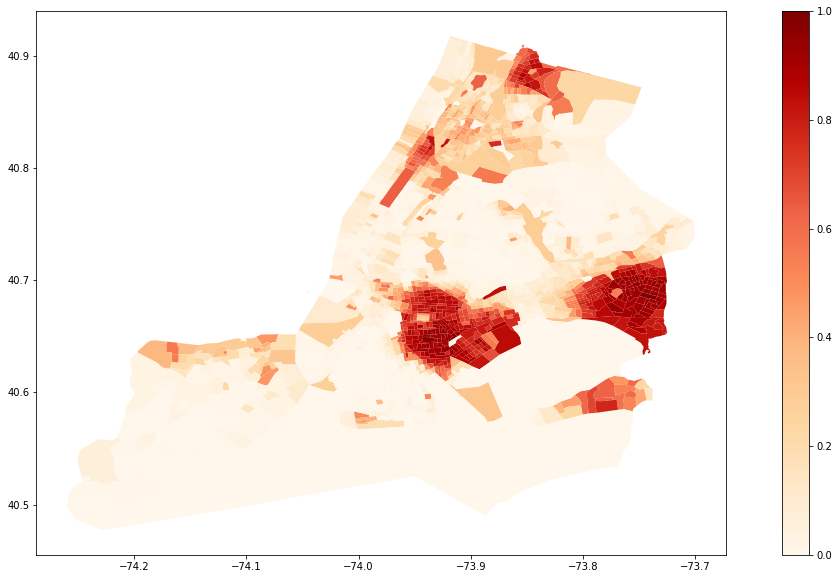

In [30]:
ax1 = ny_gdf.plot(column='rel',
                  cmap = 'OrRd', 
                  figsize=(20,10),
                  legend = True)

In [31]:
# Non-Spatial measures
ny_D = Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_G = Gini_Seg(ny_gdf, 'nhblk10', 'pop10')
ny_H = Entropy(ny_gdf, 'nhblk10', 'pop10')
ny_A = Atkinson(ny_gdf, 'nhblk10', 'pop10')
ny_xPy = Exposure(ny_gdf, 'nhblk10', 'pop10')
ny_xPx = Isolation(ny_gdf, 'nhblk10', 'pop10')
ny_R = Con_Prof(ny_gdf, 'nhblk10', 'pop10')
ny_Dbc = Bias_Corrected_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_Ddc = Density_Corrected_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_V = Correlation_R(ny_gdf, 'nhblk10', 'pop10')
ny_Dct = Modified_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_Gct = Modified_Gini_Seg(ny_gdf, 'nhblk10', 'pop10')

In [32]:
# Spatial measures
ny_SD = Spatial_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_PARD = Perimeter_Area_Ratio_Spatial_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_BSD = Boundary_Spatial_Dissim(ny_gdf, 'nhblk10', 'pop10')
ny_ACE = Absolute_Centralization(ny_gdf, 'nhblk10', 'pop10')
ny_ACO = Absolute_Concentration(ny_gdf, 'nhblk10', 'pop10')
ny_DEL = Delta(ny_gdf, 'nhblk10', 'pop10')
ny_RCE = Relative_Centralization(ny_gdf, 'nhblk10', 'pop10')
ny_RCL = Relative_Clustering(ny_gdf, 'nhblk10', 'pop10')
ny_RCO = Relative_Concentration(ny_gdf, 'nhblk10', 'pop10')
ny_SxPy = Spatial_Exposure(ny_gdf, 'nhblk10', 'pop10')
ny_SxPx = Spatial_Isolation(ny_gdf, 'nhblk10', 'pop10')
ny_SPP = Spatial_Prox_Prof(ny_gdf, 'nhblk10', 'pop10')
ny_SP = Spatial_Proximity(ny_gdf, 'nhblk10', 'pop10')

In [33]:
ny_all_measures = (ny_D, ny_G, ny_H, ny_xPx, ny_xPy, ny_A, ny_V, ny_R, ny_Dct, ny_Gct, ny_Dbc, ny_Ddc, ny_SPP, ny_SD, ny_BSD, ny_PARD, ny_SxPx, ny_SxPy, ny_SP, ny_RCL, ny_DEL, ny_ACO, ny_RCO, ny_ACE, ny_RCE)

In [34]:
la_ny_pairwise = tuple(zip(all_measures, ny_all_measures))

In [35]:
e = ThreadPoolExecutor()

la_ny_application = [e.submit(Timed_Compare_Segregation, i, iterations = overall_iterations_frequency) 
                              for i in la_ny_pairwise]

In [ ]:
la_ny_application_result = [f.result() for f in la_ny_application]

Correlation_R time: 120.28665709495544
Dissim time: 121.30489230155945
Isolation time: 122.87087631225586
Exposure time: 125.7392270565033
Atkinson time: 126.5796525478363
Entropy time: 131.4185347557068
Gini_Seg time: 195.67284202575684
Delta time: 994.2558534145355
Absolute_Concentration time: 1000.8554859161377
Relative_Concentration time: 1005.516669511795


In [1]:
la_la_application

NameError: name 'la_la_application' is not defined